In [1]:
from sklearn import datasets

iris = datasets.load_iris()

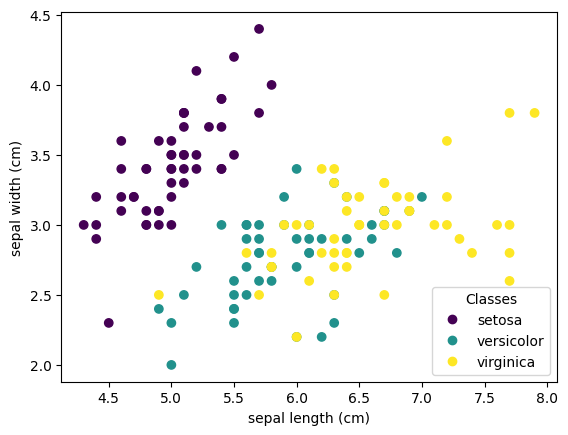

In [2]:
import matplotlib.pyplot as plt

_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

In [5]:
from sklearn.model_selection import train_test_split

X = iris.data  # les attributs
y = iris.target  # les étiquettes

# Diviser les données en jeux d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Taille du jeu d'entraînement :", len(X_train))
print("Taille du jeu de test :", len(X_test))

Taille du jeu d'entraînement : 105
Taille du jeu de test : 45


In [6]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# Créer un modèle SVM linéaire avec les paramètres donnés
svm_model = LinearSVC(C=0.05, random_state=42)

# Entraîner le modèle sur les données d'entraînement
svm_model.fit(X_train, y_train)

# Prédire les étiquettes pour le jeu de test
y_pred = svm_model.predict(X_test)

# Calculer la précision du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Précision du modèle SVM linéaire :", accuracy)

Précision du modèle SVM linéaire : 0.9333333333333333


C:\Users\TRETEC\AppData\Roaming\Python\Python310\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


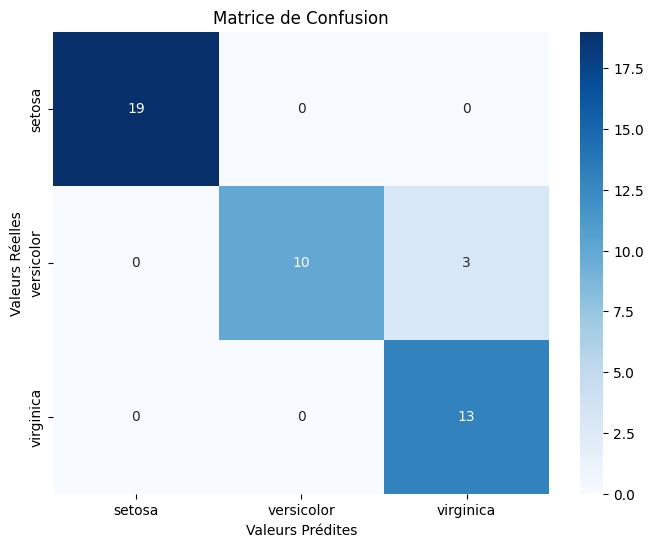

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)

# Afficher la matrice de confusion avec seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', 
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Valeurs Prédites')
plt.ylabel('Valeurs Réelles')
plt.title('Matrice de Confusion')
plt.show()

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Définir la grille des paramètres à rechercher
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001, 'scale', 'auto']}

# Créer un modèle SVM
svm_model = SVC(kernel='rbf')  # utiliser le noyau RBF pour une SVM non linéaire

# Créer un objet GridSearchCV
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')

# Effectuer la recherche sur la grille des paramètres
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres trouvés
print("Meilleurs paramètres :", grid_search.best_params_)

# Afficher la meilleure précision trouvée
print("Meilleure précision :", grid_search.best_score_)

Meilleurs paramètres : {'C': 100, 'gamma': 0.01}
Meilleure précision : 0.9714285714285715


In [10]:
from sklearn.svm import SVC

# Créer un modèle SVM avec noyau RBF et les paramètres spécifiés
svm_model_rbf = SVC(C=0.006, kernel='rbf', gamma='scale')

# Entraîner le modèle sur les données d'entraînement
svm_model_rbf.fit(X_train, y_train)

# Prédire les étiquettes pour le jeu de test
y_pred_rbf = svm_model_rbf.predict(X_test)

# Calculer la précision du modèle
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print("Précision du modèle SVM avec noyau RBF :", accuracy_rbf)

Précision du modèle SVM avec noyau RBF : 0.5555555555555556


In [11]:
# Créer un modèle SVM avec noyau polynomial et les paramètres spécifiés
svm_model_poly = SVC(C=1, kernel='poly', gamma='auto', degree=7)

# Entraîner le modèle sur les données d'entraînement
svm_model_poly.fit(X_train, y_train)

# Prédire les étiquettes pour le jeu de test
y_pred_poly = svm_model_poly.predict(X_test)

# Calculer la précision du modèle
accuracy_poly = accuracy_score(y_test, y_pred_poly)
print("Précision du modèle SVM avec noyau polynomial :", accuracy_poly)

Précision du modèle SVM avec noyau polynomial : 0.9777777777777777


In [12]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Charger les données breast_cancer
data = load_breast_cancer()
X = data.data
y = data.target

# Diviser les données en jeu d'entraînement et jeu de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Créer un modèle SVM avec noyau RBF
svm_model = SVC(kernel='rbf', random_state=42)

# Entraîner le modèle sur les données d'entraînement
svm_model.fit(X_train, y_train)

# Prédire les étiquettes pour le jeu de test
y_pred = svm_model.predict(X_test)

# Calculer la précision du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Précision du modèle SVM :", accuracy)

# Afficher un rapport de classification
print("\nRapport de classification :")
print(classification_report(y_test, y_pred, target_names=data.target_names))

Précision du modèle SVM : 0.935672514619883

Rapport de classification :
              precision    recall  f1-score   support

   malignant       1.00      0.83      0.90        63
      benign       0.91      1.00      0.95       108

    accuracy                           0.94       171
   macro avg       0.95      0.91      0.93       171
weighted avg       0.94      0.94      0.93       171

